In [175]:
import pandas as pd
import os
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
import re
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from pprint import pprint
import pyLDAvis.gensim
import pickle 
import pyLDAvis



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gsevr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [176]:
df = pd.read_csv('comments.csv',delimiter=';')
df.drop(df.columns[1],axis=1,inplace=True)

In [177]:
def preprocess(text):
    t = text.lower()
    # t = re.sub('_',r'',t)
    # t = re.sub('\d+',r'',t)
    t = re.sub(r'@[^ ]*',r'',t)
    t = re.sub(r'\W+',r' ',t)
    t = re.sub(r'(could|would|like|list|net|mailto|subject|http)', '', t)
    t = re.sub(r'\b\w{1,3}\b', '', t)
    stopwords_list = stopwords.words('english')
    txt = ' '.join([word for word in t.split() if word not in stopwords_list])
    return txt

lemmatizer = WordNetLemmatizer()


df['pre_com'] = [' '.join([lemmatizer.lemmatize(preprocess(email))])
                 .strip() for email in df['comment']]

In [178]:
text = '@paul i believe that accurate beliefs'

re.sub(r'@[^ ]*',r'',text)

' i believe that accurate beliefs'

In [179]:
df

,comment,pre_com
0,it is very possible that social media have alr...,possible social media already cost american de...
1,@paul i believe that accurate beliefs are abso...,believe accurate beliefs absolutely necessary ...
2,@chris v our cognitive systems are not designe...,cognitive systems designed natural selection g...
3,@paul absolutely agree. i don’t think even lib...,absolutely agree think even liberal educated p...
4,@paul belief is a a trait that developed late ...,belief trait developed late evolution necessary
...,...,...
1443,purdue pharma's sackler family paid $6 billion...,purdue pharma sackler family paid billion doll...
1444,"unless prevented, the nihilistic qualities of ...",unless prevented nihiic qualities currently sm...
1445,"putting ""the"" government in charge of things i...",putting government charge things hardly soluti...
1446,this is just another example of 'extinction by...,another example extinction stupidity much glob...


c:\Users\gsevr\anaconda3\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


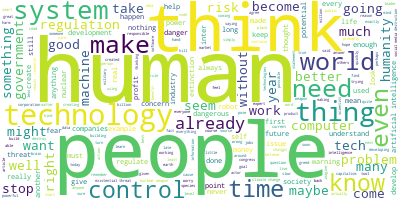

In [180]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(df['pre_com'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [181]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
# def remove_stopwords(texts):
#     return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

data = df.pre_com.values.tolist()
data_words = list(sent_to_words(data))

# # remove stop words
# data_words = remove_stopwords(data_words)
# print(data_words[:1][0][:30])

In [182]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [183]:

# number of topics
num_topics = 4

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       random_state=1)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.008*"people" + 0.007*"human" + 0.005*"technology" + 0.004*"think" + '
  '0.004*"stop" + 0.004*"world" + 0.004*"humans" + 0.003*"nuclear" + '
  '0.003*"even" + 0.003*"systems"'),
 (1,
  '0.007*"human" + 0.006*"think" + 0.006*"technology" + 0.004*"humans" + '
  '0.004*"make" + 0.004*"world" + 0.004*"people" + 0.004*"intelligence" + '
  '0.003*"tech" + 0.003*"humanity"'),
 (2,
  '0.009*"people" + 0.005*"even" + 0.005*"make" + 0.004*"human" + '
  '0.004*"think" + 0.004*"humans" + 0.003*"maybe" + 0.003*"technology" + '
  '0.003*"tech" + 0.003*"already"'),
 (3,
  '0.007*"people" + 0.005*"technology" + 0.005*"human" + 0.005*"control" + '
  '0.005*"humans" + 0.004*"government" + 0.004*"world" + 0.004*"time" + '
  '0.004*"want" + 0.003*"even"')]


In [184]:


# # Visualize the topics
# pyLDAvis.enable_notebook()

# LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

# # # this is a bit time consuming - make the if statement True
# # # if you want to execute visualization prep yourself

# if 1 == 1:
#     LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
#     with open('test', 'wb') as f:
#         pickle.dump(LDAvis_prepared, f)
        
# # load the pre-prepared pyLDAvis data from disk
# with open('test', 'rb') as f:
#     LDAvis_prepared = pickle.load(f)
    
# pyLDAvis.save_html(LDAvis_prepared, 'test'+ str(num_topics) +'.html')
    
# LDAvis_prepared

In [185]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
pyLDAvis.save_html(vis, 'test_html.html')

In [186]:

# import spacy

# english_nlp = spacy.load('en_core_web_sm')

# for comment in df.head(5).pre_com:
#     spacy_parser = english_nlp(comment)
#     for entity in spacy_parser.ents:
#         comment.replace(str(entity), '')
#         print(comment)
